In [1]:
%pylab inline

import os
import pandas as pd
from collections import OrderedDict
from astropy.io import fits
from scipy.ndimage import gaussian_filter
from styles import slides

Populating the interactive namespace from numpy and matplotlib


In [2]:
def merge_stellar_nebular(fits_object):
    #wl_ste = array([fits_object[0].header["CRVAL1"]+i*fits_object[0].header["CDELT1"] for i in xrange(fits_object[0].header["NAXIS1"])])
    wl_ste = fits_object[3].data["BFIT"]
    fl_ste = fits_object[0].data.T
    #wl_ste = gaussian_filter(wl, 0.4247*fits_object[0].header["H_WRESOL"])
    wl_lin = fits_object[1].data["WAVE"]
    fl_lin = fits_object[1].data["FLUXLINE"]
    
    wl_tot = concatenate((wl_ste,wl_lin))
    wl_sor, uniq_wl = unique(wl_tot, return_index=True)
    # interpolate stellar SED in lines wavelenths
    # fill with zeros SED fluxes in line wavelengths beyond original SED
    fl_ste_tot = zeros((uniq_wl.size, fl_ste.shape[1]))
    for j in xrange(fl_ste_tot.shape[1]): fl_ste_tot[:,j] = interp(wl_sor, wl_ste, fl_ste[:,j], left=0.0, right=0.0)
    # fill with zeros line fluxes in SED wavelengths
    fl_lin_tot = zeros((wl_tot.size, fl_ste.shape[1]))
    fl_lin_tot[-wl_lin.size:] = fl_lin
    fl_lin_tot = fl_lin_tot[uniq_wl]
    
    ts_nms = ["age_{}".format(i) for i in xrange(fl_lin_tot.shape[1])]
    SEDs = pd.DataFrame(fl_ste_tot+fl_lin_tot, index=wl_sor, columns=ts_nms)
    ages = pd.Series(f[2].data["AGE"]*10**6, index=ts_nms)
    
    return ages, SEDs

In [3]:
rdir = os.path.expandvars("$HOME/Research/photometric-ew")

f = fits.open(rdir+"/models/PEGASE/SB_4_Salp_P2.fits")

In [4]:
ages, SEDs = merge_stellar_nebular(f)

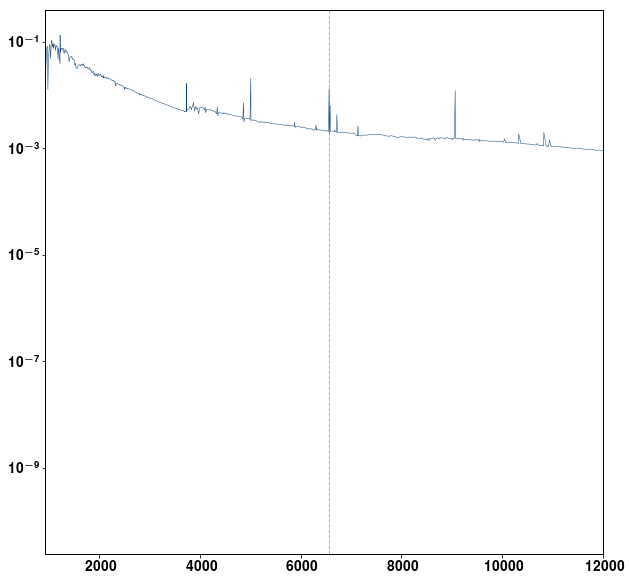

In [6]:
axvline(6562, lw=1, ls="--", color="0.7")
SEDs.get("age_10").plot(lw=0.5)
ax = gca()
ax.set_xlim(912,12000)
ax.set_yscale("log")